# Moroccan Stocks - A Preliminary Analysis

#### DijkstraFTW - October 2022

## Imports

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
import itertools

We extract all the Moroccan traded stocks from the Casablanca Stock Exchange using Media24's API. We start off by defining a function that will allow us to pull the current price, variation, volume and other useful metrics of each stock.

## Getting current stocks data :

In [ ]:
def getData(link) :
  r = requests.get(link)
  return r.json()

todayStocks = getData("https://medias24.com/content/api?method=getAllStocks&format=json")

In [ ]:
df_todayStocks = pd.DataFrame.from_dict(todayStocks["result"])
df_todayStocks['datetime'] = pd.to_datetime(df_todayStocks['datetime'], dayfirst=True, errors='coerce')
df_todayStocks.rename(columns={'name': 'name', 'name_2': 'fullName', 'volume_variation' : 'volumeVariation'}, inplace=True)
df_todayStocks.tail()

,name,fullName,ISIN,nbTitre,cours,cloture,cotation,datetime,variation,volumeVariation,volumeTitre,min,max,active
71,Auto Nejma P,AUTO NEJMA,MA0000011009,1 023 264,1817.00,"1 817,00",06/09/2022 à 14:30:52,2022-09-06 14:30:52,-8.14,-147.90,7,1817.00,1817.00,False
72,M2M Group P,M2M GROUPE,MA0000011678,647 777,812.00,"812,00",06/09/2022 à 14:30:52,2022-09-06 14:30:52,0.25,2.03,71,812.00,812.00,False
73,Central.Danone P/N,,MA0000012049,9 420 000,550.00,"550,00",24/06/2022 à 14:30:33,2022-06-24 14:30:33,-0.90,-4.95,259,550.00,550.00,False
74,Rebab Company P,REBAB,MA0000010993,176 456,115.00,"115,00",16/06/2022 à 14:30:35,2022-06-16 14:30:35,0.88,1.01,2,115.00,115.00,False
75,Nexans Maroc P,NEXANS,MA0000011140,2 243 520,189.00,"189,00",09/12/2021 à 09:30:18,2021-12-09 09:30:18,0.00,0.00,5,189.00,189.00,False


We can also pull the historical price of each stock from 25-10-2017 until the current day.

In [ ]:
def getStockHistoryData(ISIN) :
    temp = getData("https://medias24.com/content/api?ISIN=" + ISIN +"&format=json&method=getPriceHistory&from=2017-01-01&to=2022-09-21")
    df = pd.DataFrame.from_dict(temp["result"])
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    return df

In [ ]:
df_historyStockBCP = getStockHistoryData("MA0000011884")
df_historyStockAttijari = getStockHistoryData("MA0000012445")
df_historyStockBMCI = getStockHistoryData("MA0000010811")
df_historyStockBCP = getStockHistoryData("MA0000011884")
df_historyStockAddoha = getStockHistoryData("MA0000011512")
df_historyStockCIH = getStockHistoryData("MA0000011454")
df_historyStockIAM = getStockHistoryData("MA0000011488")
df_historyStockIAM.head()

,date,value,min,max,variation,volume
0,2017-10-25,135.90,135.50,135.90,-0.04,113354
1,2017-10-26,135.90,135.55,135.90,0.00,23221
2,2017-10-27,135.70,135.60,135.90,-0.15,38813
3,2017-10-30,135.55,135.50,136.50,-0.11,42385
4,2017-10-31,135.30,135.30,135.95,-0.18,116190


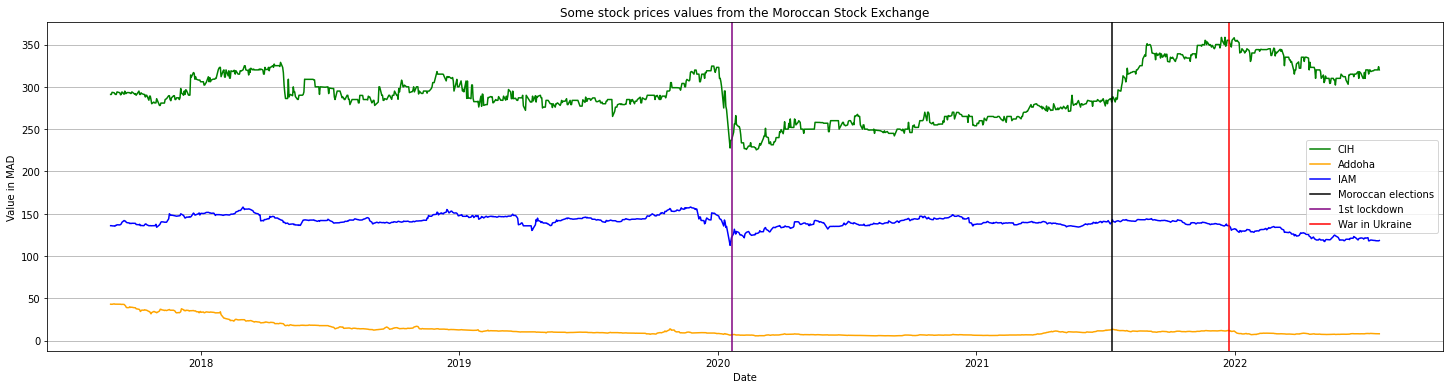

In [ ]:
formatter = mdates.DateFormatter("%Y")
fig = plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
plt.plot(df_historyStockCIH['date'], df_historyStockCIH['value'], label='CIH', color='green')
plt.plot(df_historyStockAddoha['date'], df_historyStockAddoha['value'], label ='Addoha', color='orange')
plt.plot(df_historyStockIAM['date'], df_historyStockIAM['value'], label='IAM', color='blue')
plt.axvline(dt.datetime(2021,9,8), color='black', label="Moroccan elections")
plt.axvline(dt.datetime(2020,3,20), color='purple', label="1st lockdown")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.xlabel('Date')
plt.ylabel('Value in MAD')
plt.title("Some stock prices values from the Moroccan Stock Exchange")
plt.grid(axis="y")
plt.legend()
plt.show()

We can also plot some stocks prices based on the company's sector of activity. 

For example, for the Energy sector :

In [ ]:
df_historyStockAfriquia = getStockHistoryData("MA0000010951")
df_historyStockTotal = getStockHistoryData("MA0000012262")

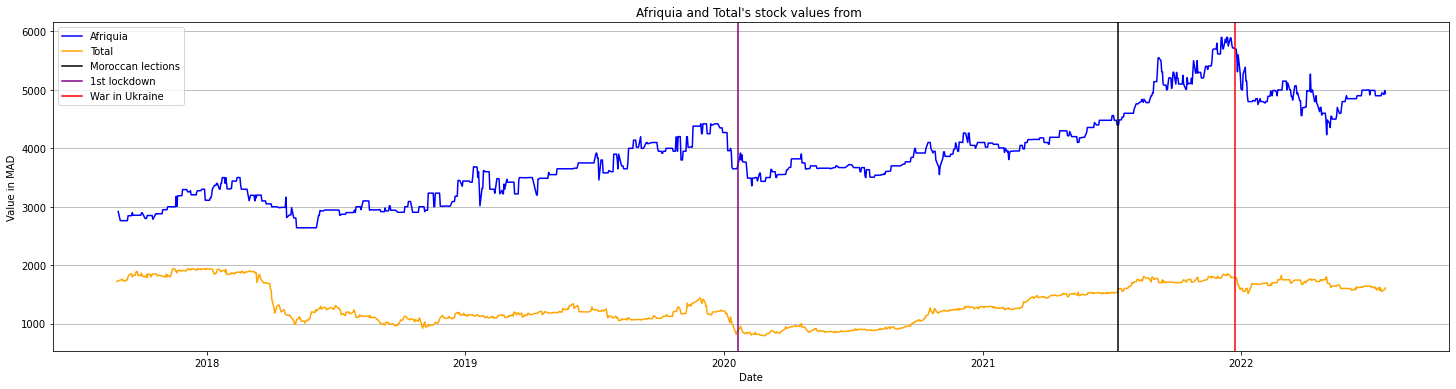

In [ ]:
formatter = mdates.DateFormatter("%Y")
fig = plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
plt.plot(df_historyStockAfriquia['date'], df_historyStockAfriquia['value'], label='Afriquia', color='blue')
plt.plot(df_historyStockTotal['date'], df_historyStockTotal['value'], label ='Total', color='orange')
plt.axvline(dt.datetime(2021,9,8), color='black', label="Moroccan lections")
plt.axvline(dt.datetime(2020,3,20), color='purple', label="1st lockdown")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.xlabel('Date')
plt.grid(axis="y")
plt.ylabel('Value in MAD')
plt.title("Afriquia and Total's stock values from ")
plt.legend()
plt.show()

From this plot, we can say that the first lockdown as well as the the war in Ukraine heavily impacted the respective stock price of Afriquia and Total. 

We can also calculate the Moving Average of the stock price of a stock to cut down "noise". It smoothens the line and helps showcase the increasing or decreasing trends of the stock price.

In [ ]:
df_historyStockAfriquia_moving_average_50 = df_historyStockAfriquia.copy()
df_historyStockAfriquia_moving_average_50['value'] = df_historyStockAfriquia_moving_average_50['value'].rolling(50).mean()
df_historyStockAfriquia_moving_average_50 = pd.DataFrame(df_historyStockAfriquia_moving_average_50)

df_historyStockAfriquia_moving_average_200 = df_historyStockAfriquia.copy()
df_historyStockAfriquia_moving_average_200['value'] = df_historyStockAfriquia_moving_average_200['value'].rolling(200).mean()
df_historyStockAfriquia_moving_average_200 = pd.DataFrame(df_historyStockAfriquia_moving_average_200)

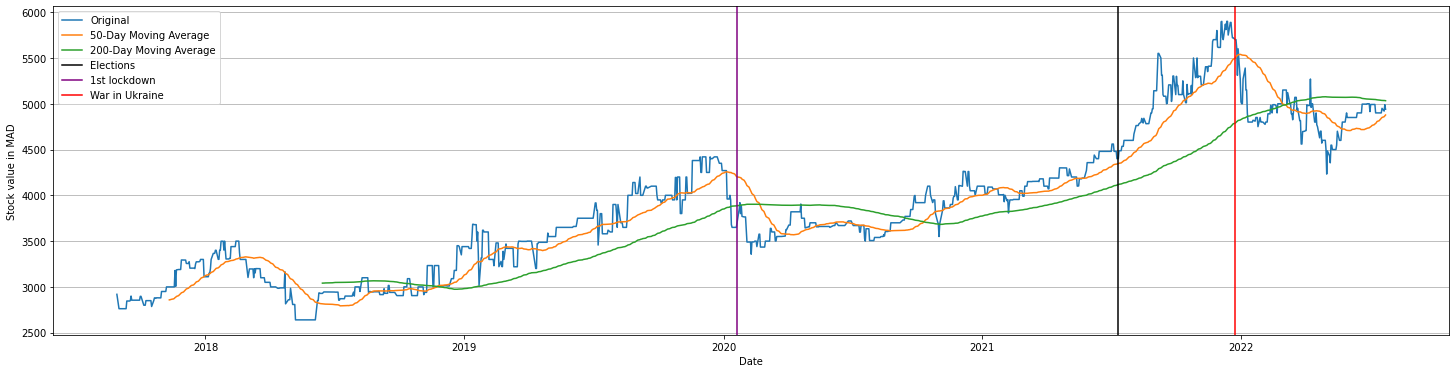

In [ ]:
formatter = mdates.DateFormatter("%Y")
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
plt.plot(df_historyStockAfriquia['date'], df_historyStockAfriquia['value'], label="Original")
plt.plot(df_historyStockAfriquia_moving_average_50['date'], df_historyStockAfriquia_moving_average_50['value'], label="50-Day Moving Average")
plt.plot(df_historyStockAfriquia_moving_average_200['date'], df_historyStockAfriquia_moving_average_200['value'],  label="200-Day Moving Average")
plt.axvline(dt.datetime(2021,9,8), color='black', label="Elections")
plt.axvline(dt.datetime(2020,3,20), color='purple', label="1st lockdown")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Stock value in MAD")
plt.legend(loc="upper left")
plt.show()

## Analysing some stocks's performances

We select a few stocks to analyse their relative performance by calculating the percentage of daily change of the price of the stock. We can then determine the correlation to see whether the returns are affected by other stock's returns. 

The selected stocks are : 

*   Attijariwafa Bank
*   BMCI
*   BCP
*   Addoha
*   CIH
*   IAM







In [ ]:
df_groupedStocks = pd.DataFrame({})

df_groupedStocks['date'] = df_historyStockBCP['date']
df_groupedStocks['Attijariwafa Bank'] = df_historyStockAttijari['value']
df_groupedStocks['BMCI'] = df_historyStockBMCI['value']
df_groupedStocks['BCP'] = df_historyStockBCP['value']
df_groupedStocks['Addoha'] = df_historyStockAddoha['value']
df_groupedStocks['CIH'] = df_historyStockCIH['value']
df_groupedStocks['IAM'] = df_historyStockIAM['value']

df_groupedStocks_pct = df_groupedStocks.set_index('date').pct_change()
df_groupedStocks_pct_corr = df_groupedStocks_pct.corr()

df_groupedStocks_pct.tail()

,Attijariwafa Bank,BMCI,BCP,Addoha,CIH,IAM
date,,,,,,
2022-09-15,0.000000,0.0,0.000000,0.001214,0.000000,0.000845
2022-09-16,0.006849,0.0,0.001953,-0.003636,0.011875,-0.003376
2022-09-19,-0.006803,0.0,0.000000,0.003650,-0.011736,-0.000847
2022-09-20,0.004110,0.0,0.000000,-0.006061,0.000000,0.000000
2022-09-21,-0.001819,0.0,0.005653,-0.006098,0.000000,0.002966


We start of by plotting the respective returns of IAM and BCP.

Text(0, 0.5, 'Returns BCP')

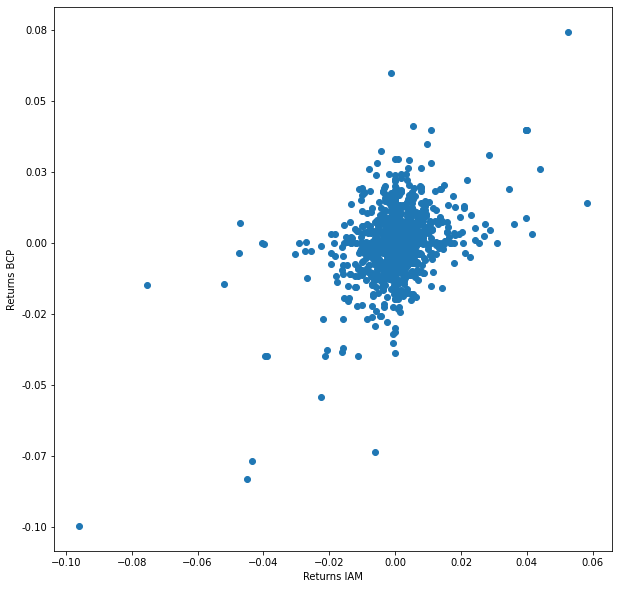

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.scatter(df_groupedStocks_pct["IAM"], df_groupedStocks_pct['BCP'])
plt.xlabel('Returns IAM')
plt.ylabel('Returns BCP')

We can see here that there are slight positive correlations among IAM's returns and BCP's returns. It seems like that the higher the IAM returns, the higher BCP returns as well for most cases.

Using the Kernel Density Estimate (KDE), we can generate estimations of the overall distributions in order to view the scatter plot of the correlation matrix to visualize possible correlations.

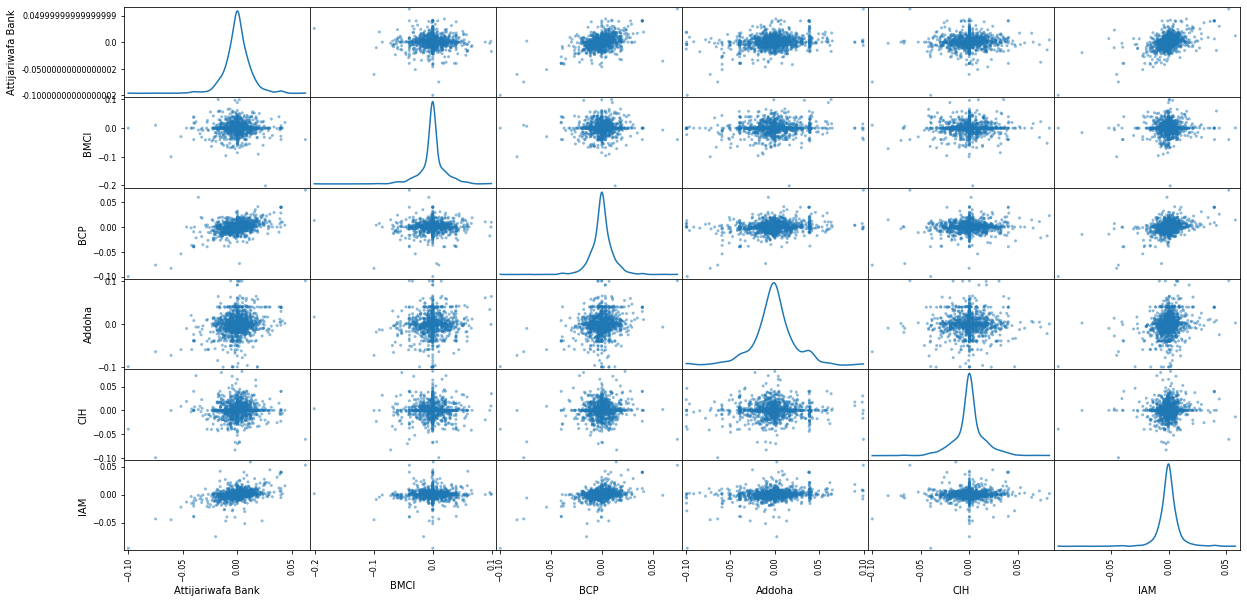

In [ ]:
pd.plotting.scatter_matrix(df_groupedStocks_pct, diagonal='kde', figsize=(20, 10));

We can then use a heat map to visualize the positive correlation among the competing stocks, where the lighter the color is, the more correlated the stocks are.

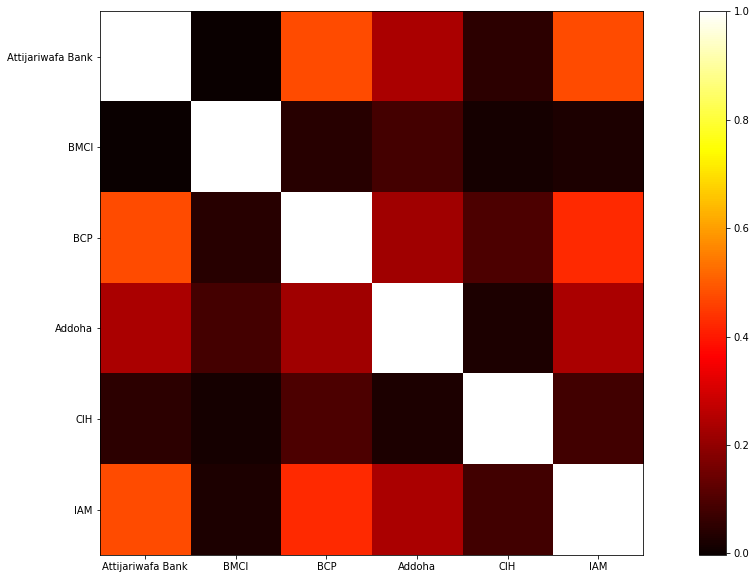

In [ ]:
plt.figure(figsize = (20,10))
plt.imshow(df_groupedStocks_pct_corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df_groupedStocks_pct_corr)), df_groupedStocks_pct_corr.columns)
plt.yticks(range(len(df_groupedStocks_pct_corr)), df_groupedStocks_pct_corr.columns);

By extracting the average of returns and the standard deviation of returns, we can also analyze each stock’s risks and returns, where the Return Rate is the mean of the stocks's price, and the Risk is it's standard deviation.

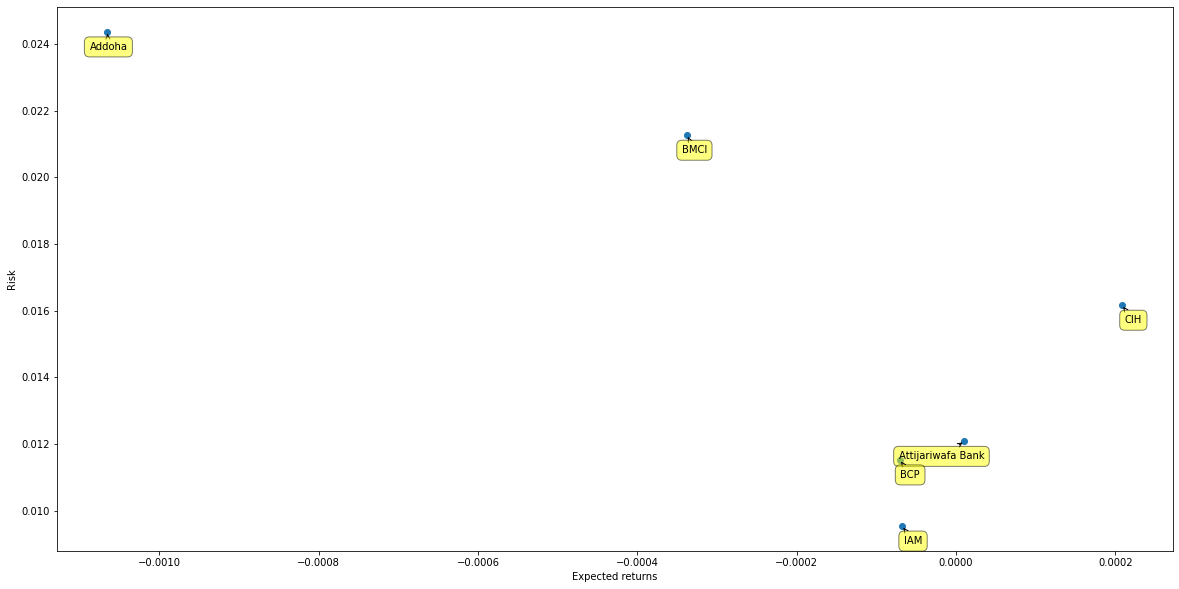

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(df_groupedStocks_pct.mean(), df_groupedStocks_pct.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(df_groupedStocks_pct.columns, df_groupedStocks_pct.mean(), df_groupedStocks_pct.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

The investor's choice can be represented as a line that will separate between each group of stocks. Its parameters will depend on the investor's level of accepted risk an return strategy or tolerance.

## Economic sectors analysis

We push the analysis further by viewing the respective performances of each sector, in order to better guide the investor's choices.

Sadly, the data does not reach far back in time (limited to to the last 6 months).

In [ ]:
def getSectorHistoryData(ISIN) :
    temp = getData("https://medias24.com/content/api?ISIN=" + ISIN +"&format=json&method=getSectorHistory")
    df = pd.DataFrame.from_dict(temp["result"])
    df['labels'] = pd.to_datetime(df['labels'], dayfirst=True, errors='coerce', unit='s').dt.strftime('%Y-%m-%d')
    return df

In [ ]:
def getSectorInfoData(ISIN) :
    temp = getData("https://medias24.com/content/api?ISIN=" + ISIN +"&format=json&method=getSectorInfo")
    df = pd.DataFrame.from_dict(temp)
    return df

In [ ]:
df_sectors = pd.DataFrame()
for i in range(len(df_todayStocks)) :
  if i == 6 or i == 61 or i == 32 or i == 58 :
    continue
  data = getSectorHistoryData(df_todayStocks['ISIN'][i])
  temp = pd.DataFrame(getSectorInfoData(df_todayStocks['ISIN'][i])["result"]).transpose()
  name = temp['name'].to_string().split(' ')[4]
  if i == 0 :
    df_sectors["date"] = data["labels"]
  df_sectors["value"] = data["prices"]
  df_sectors = df_sectors.rename(columns={'value' : name})
  df_sectors

In [ ]:
df_sectors = df_sectors.loc[:,~df_sectors.columns.duplicated()].copy()
dates = df_sectors['date']
cols = df_sectors.select_dtypes(exclude=['datetime']).columns
df_sectors['date'] = dates
df_sectors['date'] = pd.to_datetime(df_sectors['date'], dayfirst=True)
df_sectors

,date,TELECOMMUNICATIONS,BANQUES,LOISIRS,IMMOBILIER,BATIMENT,AGROALIMENTAIRE/PRO,DISTRIBUTEURS,CHIMIE,INDUSTRIE,...,ASSURANCES,SERVICES,SYLVICULTURE,MAT,ELECTRICITE,SOCIETES,INGENIERIES,TRANSPORTS,BOISSONS,EQUIPEMENTS
0,2022-04-29,1966.7194,13775.6031,543.0714,3415.1501,20258.2067,35489.5157,46893.2000,7337.7048,8113.8249,...,5455.9060,1108.3333,32.5398,2696.8891,2558.6593,4529.2922,134.2217,2399.9029,17401.7769,NaN
1,2022-05-04,1966.7194,13756.4597,545.3342,3442.1176,20244.2715,35719.5282,46852.3806,7530.5178,8108.7621,...,5497.1141,1101.2500,33.3214,2704.1229,2558.6593,4544.3537,134.2983,2399.9029,17401.7769,NaN
2,2022-05-05,1953.5101,13750.1936,543.0714,3465.3351,20237.7883,35576.2423,46949.7804,7493.0986,8103.6993,...,5490.8563,1104.1667,33.1843,2706.9902,2558.6593,4544.2602,130.3369,2413.2069,17401.7769,NaN
3,2022-05-06,1937.3653,13684.2772,545.3342,3418.8987,20063.6465,35495.0557,46834.0476,7349.0889,8103.6993,...,5463.1456,1104.5833,33.1569,2671.5342,2502.7934,4544.2602,132.2818,2413.2069,17335.9951,NaN
4,2022-05-09,1920.4868,13523.3852,577.9184,3380.9659,19959.9933,35394.0638,47921.2459,7389.0916,8009.7564,...,5452.3918,1104.1667,32.9101,2674.7928,2505.0280,4529.1987,129.8002,2324.6784,17401.7769,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2022-10-24,1563.1016,11477.2146,501.6622,2737.1652,14927.1297,29030.2133,42721.5547,5762.3466,8145.4673,...,4559.4708,1075.0000,36.3382,2542.5547,2319.5531,3806.0009,124.0939,1981.3189,14359.2415,NaN
123,2022-10-25,1536.6830,11570.6325,497.8154,2791.7924,15192.8681,29288.9749,42743.0783,6074.3676,8145.4673,...,4522.8852,1010.6250,38.5048,2553.8189,2324.0224,3924.9867,120.0301,2040.7125,14359.2415,NaN
124,2022-10-26,1503.6597,11119.3572,506.6403,2788.3948,15172.8549,29389.5142,42569.2025,6354.3865,8145.4673,...,4538.3067,950.0000,39.2590,2553.0853,2324.0224,3821.0624,118.3431,1948.6524,14349.8441,NaN
125,2022-10-27,1503.6597,11440.7757,506.8666,2813.9856,15260.5261,29534.7420,42274.6626,6136.7677,8044.2115,...,4547.5909,950.0000,41.5490,2559.5575,2256.9833,3730.6934,115.9404,1948.6524,14349.8441,NaN


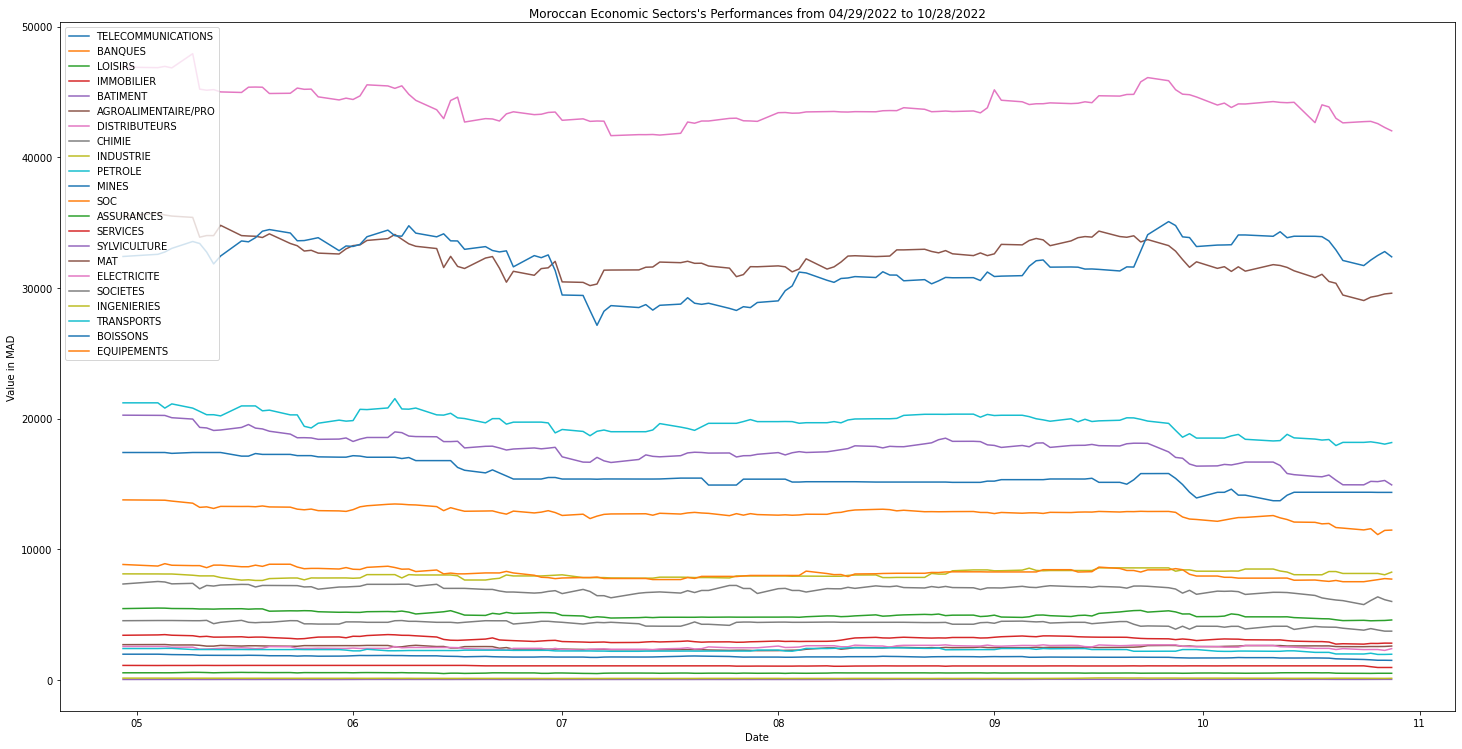

In [ ]:
formatter = mdates.DateFormatter("%m")
fig = plt.figure(figsize=(20, 10))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
for i in range(len(list(df_sectors.columns.drop('date')))) :
  plt.plot(df_sectors['date'], df_sectors[list(df_sectors.columns.drop('date'))[i]], label=list(df_sectors.columns.drop('date'))[i])
plt.xlabel('Date')
plt.ylabel('Value in MAD')
plt.title("Moroccan Economic Sectors Performances from " + str(df_sectors['date'][0].strftime("%m/%d/%Y")) +" to " + str(df_sectors['date'][len(df_sectors) - 1].strftime("%m/%d/%Y")))
plt.legend()
plt.show()

We can also view the box plot of each sector's performance.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


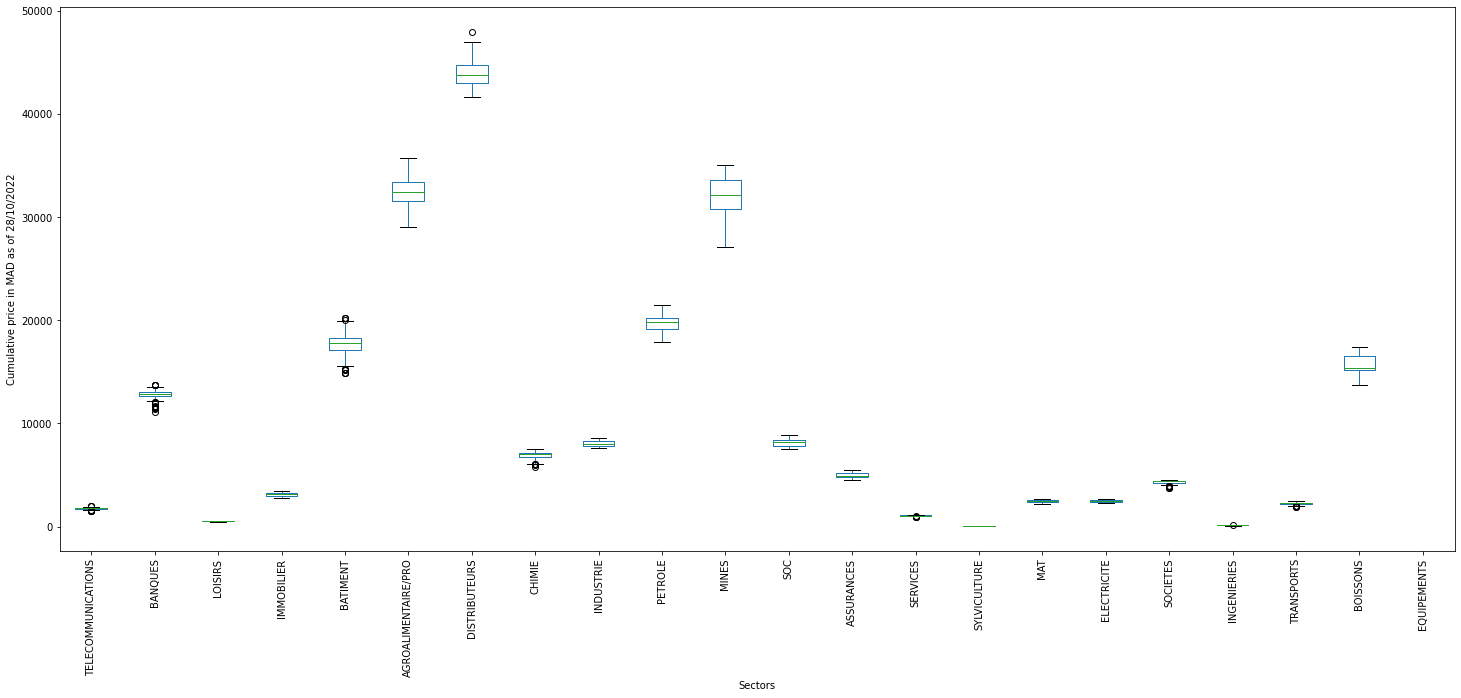

In [ ]:
plt.figure(figsize = (25,10))
df_sectors.boxplot(column = list(df_sectors.columns.drop('date')))
plt.xticks(rotation=90)
plt.xlabel("Sectors")
plt.ylabel("Cumulative price in MAD as of " + str(df_sectors['date'][len(df_sectors) - 1].strftime("%d/%m/%Y")))
plt.grid(b=None)
plt.show()

Now for the daily performance.

In [ ]:
df_sectors_perf = df_sectors.copy()
df_sectors_perf[cols] = df_sectors[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
df_sectors_perf['date'] = dates
df_temp = df_sectors_perf.drop('date', axis=1)
df_temp = df_temp.drop('EQUIPEMENTS', axis=1)
df_temp = df_temp.diff()
df_temp

,TELECOMMUNICATIONS,BANQUES,LOISIRS,IMMOBILIER,BATIMENT,AGROALIMENTAIRE/PRO,DISTRIBUTEURS,CHIMIE,INDUSTRIE,PETROLE,...,SOC,ASSURANCES,SERVICES,SYLVICULTURE,MAT,ELECTRICITE,SOCIETES,INGENIERIES,TRANSPORTS,BOISSONS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,-19.143555,2.262817,26.967529,-13.935547,230.011719,-40.820312,192.812988,-5.062500,0.000000,...,-119.743164,41.208496,-7.083252,0.781601,7.233643,0.000000,15.061523,0.076599,0.000000,0.000000
2,-13.209229,-6.266602,-2.262817,23.217529,-6.482422,-143.285156,97.402344,-37.418945,-5.062988,-403.248047,...,181.693359,-6.257812,2.916748,-0.137100,2.867432,0.000000,-0.093262,-3.961395,13.303955,0.000000
3,-16.144775,-65.916016,2.262817,-46.436523,-174.142578,-81.187500,-115.734375,-144.009766,0.000000,322.597656,...,-119.817383,-27.710938,0.416504,-0.027401,-35.456055,-55.865723,0.000000,1.944901,0.000000,-65.783203
4,-16.878540,-160.892578,32.584167,-37.932861,-103.652344,-100.992188,1087.199219,40.002930,-93.942871,-322.597656,...,-28.606445,-10.753906,-0.416504,-0.246799,3.258545,2.234619,-15.061523,-2.481598,-88.528320,65.783203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-36.692505,-138.777344,-5.204407,-29.391846,-4.426758,-421.863281,94.218750,-304.020508,0.000000,0.000000,...,0.000000,22.460938,0.000000,-0.671902,-3.454102,-71.508545,-149.108643,-3.573296,-5.753906,0.000000
123,-26.418579,93.417969,-3.846802,54.627197,265.738281,258.761719,21.523438,312.020996,0.000000,42.042969,...,78.979492,-36.585449,-64.375000,2.166599,11.264160,4.469482,118.985840,-4.063805,59.393677,0.000000
124,-33.023315,-451.275391,8.824890,-3.397705,-20.013672,100.539062,-173.875000,280.019043,0.000000,-74.302734,...,76.432129,15.421387,-60.625000,0.754200,-0.733643,0.000000,-103.924316,-1.686996,-92.060181,-9.397461
125,0.000000,321.417969,0.226318,25.590820,87.671875,145.228516,-294.539062,-217.619141,-101.255859,-102.156250,...,82.847656,9.284180,0.000000,2.290001,6.472412,-67.039062,-90.369141,-2.402702,0.000000,0.000000


In [ ]:
print("Moroccan Economic Sectors Daily Performances from " + str(df_sectors['date'][0].strftime("%d/%m/%Y")) +" to " + str(df_sectors['date'][len(df_sectors) - 1].strftime("%d/%m/%Y")) + " : \n")
for i in range(len(df_temp.columns)) :
  print(list(df_temp.columns)[i] + " " + str(df_temp[df_temp.columns[i]].mean().round(1)) + " %" )

Moroccan Economic Sectors's Performances from 29/04/2022 to 28/10/2022 : 

TELECOMMUNICATIONS -3.7 %
BANQUES -18.3 %
LOISIRS -0.3 %
IMMOBILIER -4.8 %
BATIMENT -42.4 %
AGROALIMENTAIRE/PRO -46.8 %
DISTRIBUTEURS -38.7 %
CHIMIE -10.6 %
INDUSTRIE 1.1 %
PETROLE -24.1 %
MINES -0.2 %
SOC -8.9 %
ASSURANCES -6.9 %
SERVICES -1.3 %
SYLVICULTURE 0.1 %
MAT -0.8 %
ELECTRICITE -1.3 %
SOCIETES -6.3 %
INGENIERIES -0.1 %
TRANSPORTS -3.5 %
BOISSONS -24.2 %


We then repeat the same process but this time by grouping the stocks prices by sector.  We will then be able to extend to period processed.

In [ ]:
sectors = []
for i in range(len(df_todayStocks)) :
  if i == 6 or i == 61 or i == 32 or i == 58 :
    continue
  temp = pd.DataFrame(getSectorInfoData(df_todayStocks['ISIN'][i])["result"]).transpose()
  sectors.append( temp['name'].to_string().split(' ')[4])

In [ ]:
df_sectorsFull = pd.DataFrame(0, index=np.arange(len(getStockHistoryData(df_todayStocks['ISIN'][0]))), columns=df_sectors.columns)
df_sectorsFull.head()

,date,TELECOMMUNICATIONS,BANQUES,LOISIRS,IMMOBILIER,BATIMENT,AGROALIMENTAIRE/PRO,DISTRIBUTEURS,CHIMIE,INDUSTRIE,...,ASSURANCES,SERVICES,SYLVICULTURE,MAT,ELECTRICITE,SOCIETES,INGENIERIES,TRANSPORTS,BOISSONS,EQUIPEMENTS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(sectors)) :
  if i == 0 :
    df_sectorsFull['date'] = getStockHistoryData(df_todayStocks['ISIN'][0])['date']
    df_sectorsFull = df_sectorsFull.replace(np.nan, 0)
  temp = pd.DataFrame(getStockHistoryData(df_todayStocks['ISIN'][i]))
  df_sectorsFull[sectors[i]] = df_sectorsFull[sectors[i]] + temp['value']

df_sectorsFull.tail()

,date,TELECOMMUNICATIONS,BANQUES,LOISIRS,IMMOBILIER,BATIMENT,AGROALIMENTAIRE/PRO,DISTRIBUTEURS,CHIMIE,INDUSTRIE,...,ASSURANCES,SERVICES,SYLVICULTURE,MAT,ELECTRICITE,SOCIETES,INGENIERIES,TRANSPORTS,BOISSONS,EQUIPEMENTS
1217,2022-09-15,237.0,NaN,232.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,514.0,NaN,1520.0,NaN,NaN,NaN,NaN,NaN
1218,2022-09-16,236.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,514.0,NaN,1540.0,NaN,NaN,NaN,NaN,NaN
1219,2022-09-19,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,2022-09-20,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,512.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,2022-09-21,236.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,511.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sectorsFull_Extended = df_sectorsFull.copy()
df_sectorsFull_Extended['date'] = pd.to_datetime(df_sectorsFull['date'], dayfirst=True, errors='coerce')
df_sectorsFull_Extended = df_sectorsFull_Extended.fillna(df_sectorsFull.mean())
df_sectorsFull_Extended.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,date,TELECOMMUNICATIONS,BANQUES,LOISIRS,IMMOBILIER,BATIMENT,AGROALIMENTAIRE/PRO,DISTRIBUTEURS,CHIMIE,INDUSTRIE,...,ASSURANCES,SERVICES,SYLVICULTURE,MAT,ELECTRICITE,SOCIETES,INGENIERIES,TRANSPORTS,BOISSONS,EQUIPEMENTS
0,2017-10-25,271.8,3761.242222,272.0,5058.1,21260.043383,1503.655307,11438.990513,1410.0,1640.0,...,7609.74973,1878.0,285.0,21652.355452,804.0,2223.4,4154.62137,3416.0,7401.368733,4185.925373
1,2017-10-26,271.8,4192.000000,277.0,5067.3,21260.043383,1503.655307,11438.990513,1374.0,1640.0,...,7609.74973,1880.0,286.0,21652.355452,810.2,2246.0,4154.62137,3416.0,7401.368733,4185.925373
2,2017-10-27,271.4,4241.000000,276.9,5066.1,24644.880000,1503.655307,11438.990513,1443.1,1640.0,...,7609.74973,1834.0,287.4,21652.355452,856.0,2269.4,4154.62137,3417.8,5783.340000,4185.925373
3,2017-10-30,271.1,4252.100000,275.7,5022.9,24632.260000,1503.655307,10206.800000,1492.9,1628.4,...,7609.74973,1760.0,284.1,21652.355452,835.0,2240.2,5010.00000,3411.0,5783.400000,4185.925373
4,2017-10-31,270.6,4195.200000,270.0,5166.7,24689.800000,1503.655307,10178.500000,1478.0,1624.2,...,7609.74973,1760.0,288.0,21652.355452,840.0,2270.0,5030.00000,3411.1,5783.000000,4185.925373


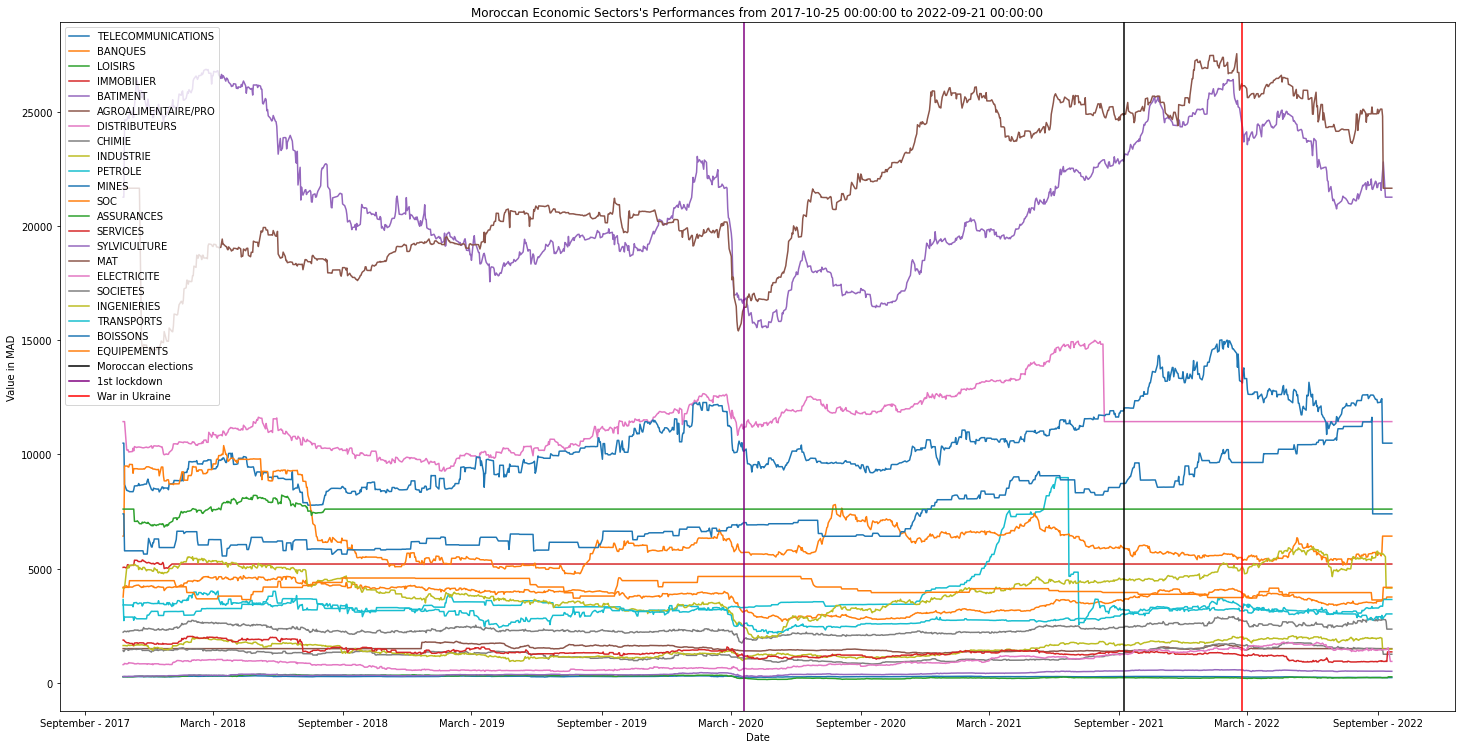

In [ ]:
formatter = mdates.DateFormatter("%B - %Y")
fig = plt.figure(figsize=(20, 10))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
for i in range(len(list(df_sectorsFull_Extended.columns.drop('date')))) :
  plt.plot(df_sectorsFull_Extended['date'], df_sectorsFull_Extended[list(df_sectorsFull_Extended.columns.drop('date'))[i]], label=list(df_sectorsFull_Extended.columns.drop('date'))[i])
plt.axvline(dt.datetime(2021,9,8), color='black', label="Moroccan elections")
plt.axvline(dt.datetime(2020,3,20), color='purple', label="1st lockdown")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.xlabel('Date')
plt.ylabel('Value in MAD')
plt.title("Moroccan Economic Sectors Performances from " + str(df_sectorsFull_Extended['date'][0]) +" to " + str(df_sectorsFull_Extended['date'][len(df_sectorsFull_Extended) - 1]))
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


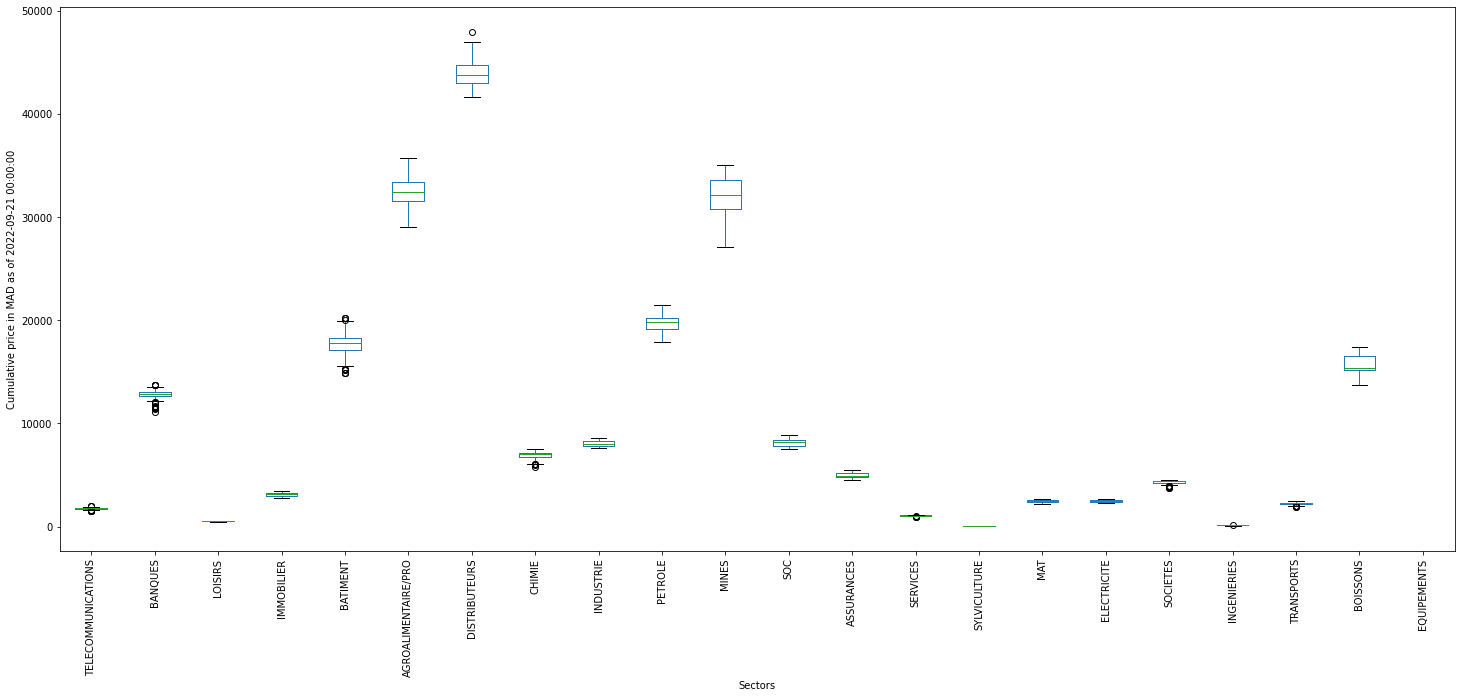

In [ ]:
plt.figure(figsize = (25,10))
df_sectors.boxplot(column = list(df_sectorsFull_Extended.columns.drop('date')))
plt.xticks(rotation=90)
plt.xlabel("Sectors")
plt.ylabel(f"Cumulative price in MAD as of {df_sectorsFull_Extended['date'][len(df_sectorsFull_Extended) - 1]}")
plt.grid(b=None)
plt.show()

In [ ]:
df_sectorsFull_ExtendedPerf = df_sectorsFull.copy()
df_sectorsFull_ExtendedPerf[cols] = df_sectorsFull[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
df_sectorsFull_ExtendedPerf = df_sectorsFull_ExtendedPerf.drop('date', axis=1)
df_sectorsFull_ExtendedPerf = df_sectorsFull_ExtendedPerf.diff()

In [ ]:
print("Moroccan Economic Sectors Performances from " + str(df_sectorsFull_Extended['date'][0].strftime("%d/%m/%Y")) +" to " + str(df_sectorsFull_Extended['date'][len(df_sectorsFull_Extended) - 1].strftime("%d/%m/%Y")) + " : \n")
rankings_adv=[]
for i in range(len(df_sectorsFull_ExtendedPerf.columns)) :
  rankings_adv.append(list(df_sectorsFull_ExtendedPerf.columns)[i] + " " + str(df_sectorsFull_ExtendedPerf[df_sectorsFull_ExtendedPerf.columns[i]].mean().round(2)) + " %" )
  print(rankings_adv[i])

Moroccan Economic Sectors's Performances from 25/10/2017 to 21/09/2022 : 

TELECOMMUNICATIONS -0.03 %
BANQUES -0.43 %
LOISIRS -0.03 %
IMMOBILIER 0.85 %
BATIMENT -1.52 %
AGROALIMENTAIRE/PRO -0.32 %
DISTRIBUTEURS 4.95 %
CHIMIE 0.06 %
INDUSTRIE 0.26 %
PETROLE 0.52 %
MINES 3.11 %
SOC -3.13 %
ASSURANCES 2.13 %
SERVICES -0.77 %
SYLVICULTURE 0.19 %
MAT 8.24 %
ELECTRICITE 0.6 %
SOCIETES 0.38 %
INGENIERIES 0.42 %
TRANSPORTS -0.38 %
BOISSONS 4.87 %
EQUIPEMENTS -0.7 %


## Portfolio Construction and Analysis

This section will try to build three different portfolios with different levels of risks in order to estimate the best configuration of weights possible, which will generate the best possible annual profit, while also maximising the Sharpe Ratio and minimizing the variance ie. Risk.

The stock’s $\beta_s$  value represents the systematic risk and volatility of an asset with respect to the overall market. As the MADEX is usually used to reflect the overall market's performance in Morocco, we will base our assessment on it. We directly retrieve each stock's $\beta_s$  value from *Investing.com*, by simply copying the respective values. 

A portfolio’s volatility is measured by the value of its standard deviation, which is computed as the square-root of the variance. In most cases, the standard deviation and  the variance are interchangeable :
$$
 \sigma_{p} = \sqrt{\sigma_{p}^2}
$$

The Sharpe Ratio is one of the most widely applied methods by investors to derive an investment’s return that can be drawn in excess to the risk free-rate ${R_f}$ per total risk :

$$
Sharpe\ ratio = \frac{R_p - R_f}{\sigma_p}
$$
where :

$\quad \quad \quad R_p\ :\ The\ portfolio\ return.$

$\quad \quad \quad R_f\ :\ The\ risk-free\ rate. $

$\quad \quad \quad \sigma_p\ :\ The\ standard\ deviation\ of\ the\ portfolio's\ return.$

In [ ]:
df_historyStockCDM = getStockHistoryData("MA0000010381")
df_historyStockAFMA = getStockHistoryData("MA0000012296")
df_historyStockLBLV = getStockHistoryData("MA0000011801")

df_historyStockHPS = getStockHistoryData("MA0000011611")

df_historyStockSID = getStockHistoryData("MA0000010019")
df_historyStockMNG = getStockHistoryData("MA0000011058")
df_historyStockLHM = getStockHistoryData("MA0000012320")

### Low Risk Portfolio

In [ ]:
df_LowRiskPortfolio = pd.DataFrame()
df_LowRiskPortfolio = df_LowRiskPortfolio.append({"name" : "Crédit du Maroc (CDM)", "beta value" : 0.23}, ignore_index=True)
df_LowRiskPortfolio = df_LowRiskPortfolio.append({"name" : "AFMA (AFM)", "beta value" : 0.53}, ignore_index=True)
df_LowRiskPortfolio = df_LowRiskPortfolio.append({"name" : "Label'Vie (LBV)", "beta value" : 0.52}, ignore_index=True)
df_LowRiskPortfolio

,name,beta value
0,Crédit du Maroc (CDM),0.23
1,AFMA (AFM),0.53
2,Label'Vie (LBV),0.52


In [ ]:
df_LowRiskPortfolioData = pd.DataFrame()
df_LowRiskPortfolioData["Crédit du Maroc (CDM)"] = df_historyStockCDM["value"]
df_LowRiskPortfolioData["AFMA (AFM)"] = df_historyStockAFMA["value"]
df_LowRiskPortfolioData["Label'Vie (LBV)"] = df_historyStockLBLV["value"]
df_LowRiskPortfolioData.head()

,Crédit du Maroc (CDM),AFMA (AFM),Label'Vie (LBV)
0,548.0,985.0,NaN
1,530.0,985.0,1695.0
2,560.0,990.0,1698.0
3,584.9,976.0,1698.0
4,584.9,975.0,1698.0


In [ ]:
logReturns = np.log(df_LowRiskPortfolioData/df_LowRiskPortfolioData.shift(1))
covMatrix = logReturns.cov() * 75

PortfoliosNum = 3000
weights = np.zeros((PortfoliosNum, len(df_LowRiskPortfolioData.columns)))
PortfoliosReturns = np.zeros((PortfoliosNum))
PortfoliosRisk = np.zeros((PortfoliosNum))
SharpeRatio = np.zeros((PortfoliosNum))

for i in range(PortfoliosNum) :
  w = np.random.uniform(size = len(df_LowRiskPortfolioData.columns))
  w = w/np.sum(w)

  weights[i, :] = w

  tempReturns = np.sum(logReturns.mean() * w)
  tempReturns = (tempReturns + 1) ** 75 - 1
  PortfoliosReturns[i] = tempReturns

  tempRiskSd = np.sqrt(np.dot(w.T, np.dot(covMatrix, w)))
  PortfoliosRisk[i] = tempRiskSd

  tempSR = tempReturns/tempRiskSd
  SharpeRatio[i] = tempSR

minVar = weights[PortfoliosRisk.argmin()]
maxSR = weights[SharpeRatio.argmax()]
asset = df_LowRiskPortfolioData.columns

minVar = pd.Series(minVar, index=asset)
minVar = minVar.sort_values()

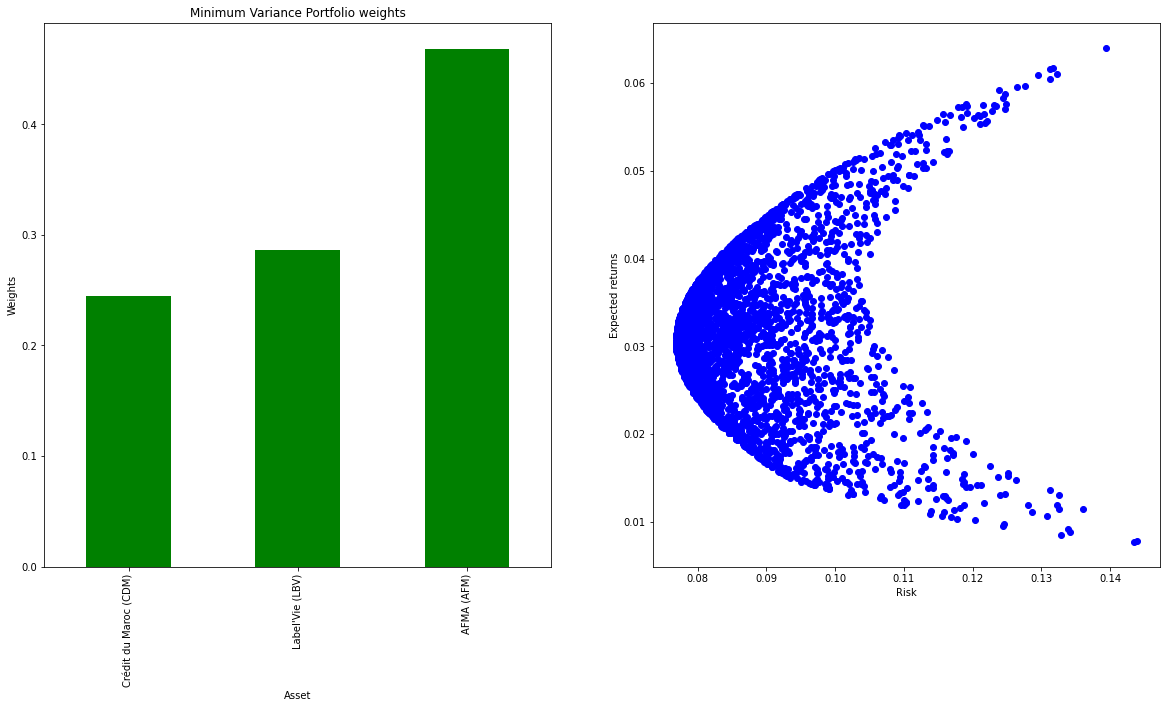

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
#fig = figure.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.set_xlabel("Asset")
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
minVar.plot(kind = 'bar', color='green')

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(PortfoliosRisk, PortfoliosReturns, color="blue")
ax2.set_ylabel('Expected returns')
ax2.set_xlabel('Risk')

plt.show()

In [ ]:
df_LowRiskPortfolio_Result = pd.DataFrame(minVar)
df_LowRiskPortfolio_Result = df_LowRiskPortfolio_Result.rename(columns={0 : "Optimal weights"})
df_LowRiskPortfolio_Result["Optimal Sharpe ratio"] = maxSR
df_LowRiskPortfolio_Result

,Optimal weights,Optimal Sharpe ratio
Crédit du Maroc (CDM),0.244993,0.008893
Label'Vie (LBV),0.286709,0.359097
AFMA (AFM),0.468298,0.632010


In [ ]:
print("Portfolio annual return : " + str(round(max(PortfoliosReturns) *100, 2)) + "%\n" +
      "Portfolio volatility : " + str(round(min(PortfoliosRisk) * 100, 2)) + "%\n" +
      "Sharpe ratio : " + str(round(SharpeRatio.max(), 2)))

Portfolio annual return : 6.41%
Portfolio volatility : 7.68%
Sharpe ratio : 0.5


### Moderate Risk Portfolio

In [ ]:
df_ModerateRiskPortfolio = pd.DataFrame()
df_ModerateRiskPortfolio = df_ModerateRiskPortfolio.append({"name" : "Banque Centrale Populaire (BCP)", "beta value" : 0.9}, ignore_index=True)
df_ModerateRiskPortfolio = df_ModerateRiskPortfolio.append({"name" : "Attijariwafa Bank (CIH)", "beta value" : 1.01}, ignore_index=True)
df_ModerateRiskPortfolio = df_ModerateRiskPortfolio.append({"name" : "HPS company (HPS)", "beta value" : 0.84}, ignore_index=True)
df_ModerateRiskPortfolio

,name,beta value
0,Banque Centrale Populaire (BCP),0.90
1,Attijariwafa Bank (CIH),1.01
2,HPS company (HPS),0.84


In [ ]:
df_ModerateRiskPortfolioData = pd.DataFrame()
df_ModerateRiskPortfolioData["Banque Centrale Populaire (BCP)"] = df_historyStockBCP["value"]
df_ModerateRiskPortfolioData["Attijariwafa Bank (CIH)"] = df_historyStockCIH["value"]
df_ModerateRiskPortfolioData["HPS company (HPS)"] = df_historyStockHPS["value"]
df_ModerateRiskPortfolioData.head()

,Banque Centrale Populaire (BCP),Attijariwafa Bank (CIH),HPS company (HPS)
0,305.0,291.0,NaN
1,303.0,291.0,NaN
2,305.0,293.5,1650.0
3,300.0,293.0,1650.0
4,300.0,291.6,1604.0


In [ ]:
logReturnsModerate = np.log(df_ModerateRiskPortfolioData/df_ModerateRiskPortfolioData.shift(1))
covMatrixModerate = logReturnsModerate.cov() * 75

PortfoliosNum = 3000
weightsModerate = np.zeros((PortfoliosNum, len(df_ModerateRiskPortfolioData.columns)))
PortfoliosReturnsModerate = np.zeros((PortfoliosNum))
PortfoliosRiskModerate = np.zeros((PortfoliosNum))
SharpeRatioModerate = np.zeros((PortfoliosNum))

for i in range(PortfoliosNum) :
  w_M = np.random.uniform(size = len(df_ModerateRiskPortfolioData.columns))
  w_M = w_M/np.sum(w_M)

  weightsModerate[i, :] = w_M

  tempReturnsModerate = np.sum(logReturnsModerate.mean() * w_M)
  tempReturnsModerate = (tempReturnsModerate + 1) ** 75 - 1
  PortfoliosReturnsModerate[i] = tempReturnsModerate

  tempRiskSdModerate = np.sqrt(np.dot(w_M.T, np.dot(covMatrixModerate, w_M)))
  PortfoliosRiskModerate[i] = tempRiskSdModerate

  tempSRModerate = tempReturnsModerate/tempRiskSdModerate
  SharpeRatioModerate[i] = tempSRModerate

minVarModerate = weightsModerate[PortfoliosRiskModerate.argmin()]
maxSRModerate = weightsModerate[SharpeRatioModerate.argmax()]
assetModerate = df_ModerateRiskPortfolioData.columns

minVarModerate = pd.Series(minVarModerate, index=assetModerate)
minVarModerate = minVarModerate.sort_values()

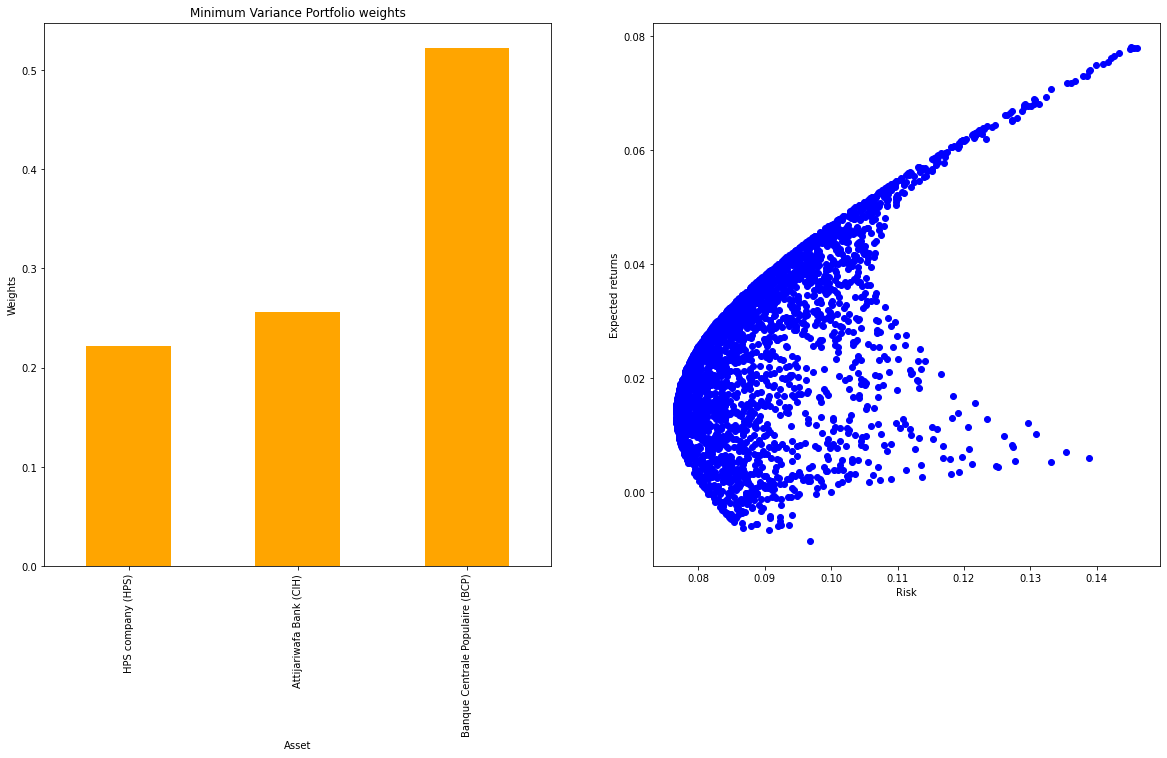

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel("Asset")
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
minVarModerate.plot(kind = 'bar', color='orange')

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(PortfoliosRiskModerate, PortfoliosReturnsModerate, color="blue")
ax2.set_ylabel('Expected returns')
ax2.set_xlabel('Risk')

plt.show()

In [ ]:
df_ModerateRiskPortfolio_Result = pd.DataFrame(minVarModerate)
df_ModerateRiskPortfolio_Result = df_ModerateRiskPortfolio_Result.rename(columns={0 : "Weights"})
df_ModerateRiskPortfolio_Result["Sharpe ratios"] = maxSRModerate
df_ModerateRiskPortfolio_Result

,Weights,Sharpe ratios
HPS company (HPS),0.222338,0.006714
Attijariwafa Bank (CIH),0.255918,0.063435
Banque Centrale Populaire (BCP),0.521745,0.929851


In [ ]:
print("Portfolio annual return : " + str(round(max(PortfoliosReturnsModerate) *100, 2)) + "%\n" +
      "Portfolio volatility : " + str(round(min(PortfoliosRiskModerate) * 100, 2)) + "%\n" +
      "Sharpe ratio : " + str(round(SharpeRatioModerate.max(), 2)))

Portfolio annual return : 7.8%
Portfolio volatility : 7.66%
Sharpe ratio : 0.54


### High Risk Portfolio

In [ ]:
df_HighRiskPortfolio = pd.DataFrame()
df_HighRiskPortfolio = df_HighRiskPortfolio.append({"name" : "SONASID (SID) ", "beta value" : 1.21}, ignore_index=True)
df_HighRiskPortfolio = df_HighRiskPortfolio.append({"name" : "Managem (MNG)", "beta value" : 2.14}, ignore_index=True)
df_HighRiskPortfolio = df_HighRiskPortfolio.append({"name" : "LafargeHolcim (LHM)", "beta value" : 1.65}, ignore_index=True)
df_HighRiskPortfolio

,name,beta value
0,SONASID (SID),1.21
1,Managem (MNG),2.14
2,LafargeHolcim (LHM),1.65


In [ ]:
df_HighRiskPortfolioData = pd.DataFrame()
df_HighRiskPortfolioData["SONASID (SID)"] = df_historyStockSID["value"]
df_HighRiskPortfolioData["Managem (MNG)"] = df_historyStockMNG["value"]
df_HighRiskPortfolioData["LafargeHolcim (LHM)"] = df_historyStockLHM["value"]
df_HighRiskPortfolioData.head()

,SONASID (SID),Managem (MNG),LafargeHolcim (LHM)
0,765.0,1630.0,NaN
1,750.0,1627.0,1940.0
2,751.0,1690.0,1900.0
3,743.0,1650.0,1890.0
4,736.0,1650.0,1918.0


In [ ]:
logReturnsHigh = np.log(df_HighRiskPortfolioData/df_HighRiskPortfolioData.shift(1))
covMatrixHigh = logReturnsHigh.cov() * 75

PortfoliosNum = 3000
weightsHigh = np.zeros((PortfoliosNum, len(df_HighRiskPortfolioData.columns)))
PortfoliosReturnsHigh = np.zeros((PortfoliosNum))
PortfoliosRiskHigh = np.zeros((PortfoliosNum))
SharpeRatioHigh = np.zeros((PortfoliosNum))

for i in range(PortfoliosNum) :
  w_H = np.random.uniform(size = len(df_HighRiskPortfolioData.columns))
  w_H = w_H/np.sum(w_H)

  weightsHigh[i, :] = w_H

  tempReturnsHigh = np.sum(logReturnsHigh.mean() * w_H)
  tempReturnsHigh = (tempReturnsHigh + 1) ** 75 - 1
  PortfoliosReturnsHigh[i] = tempReturnsHigh

  tempRiskSdHigh = np.sqrt(np.dot(w_H.T, np.dot(covMatrixHigh, w_H)))
  PortfoliosRiskHigh[i] = tempRiskSdHigh

  tempSRHigh = tempReturnsHigh/tempRiskSdHigh
  SharpeRatioHigh[i] = tempSRHigh

minVarHigh = weightsHigh[PortfoliosRiskHigh.argmin()]
maxSRHigh = weightsHigh[SharpeRatioHigh.argmax()]
assetHigh = df_HighRiskPortfolioData.columns

minVarHigh = pd.Series(minVarHigh, index=assetHigh)
minVarHigh = minVarHigh.sort_values()

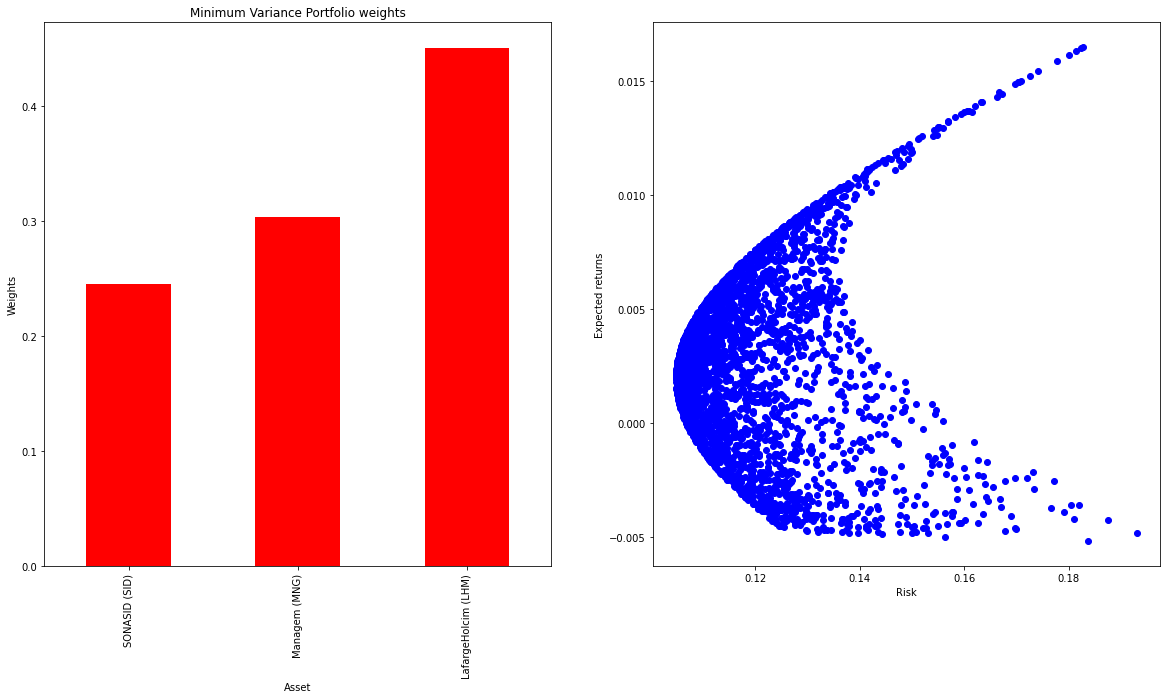

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel("Asset")
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
minVarHigh.plot(kind = 'bar', color='red')

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(PortfoliosRiskHigh, PortfoliosReturnsHigh, color="blue")
ax2.set_ylabel('Expected returns')
ax2.set_xlabel('Risk')

plt.show()

In [ ]:
df_HighRiskPortfolio_Result = pd.DataFrame(minVarHigh)
df_HighRiskPortfolio_Result = df_HighRiskPortfolio_Result.rename(columns={0 : "Weights"})
df_HighRiskPortfolio_Result["Sharpe ratios"] = maxSRHigh
df_HighRiskPortfolio_Result

,Weights,Sharpe ratios
SONASID (SID),0.245272,0.011262
Managem (MNG),0.304104,0.969600
LafargeHolcim (LHM),0.450624,0.019137


In [ ]:
print("Portfolio annual return : " + str(round(max(PortfoliosReturnsHigh) *100, 2)) + "%\n" +
      "Portfolio volatility : " + str(round(min(PortfoliosRiskHigh) * 100, 2)) + "%\n" +
      "Sharpe ratio : " + str(round(SharpeRatioHigh.max(), 2)))

Portfolio annual return : 1.65%
Portfolio volatility : 10.48%
Sharpe ratio : 0.09


We see that the best portfolio out of the three is the moderate-risk portfolio. Considering the risk-adjusted return, this portfolio has given the highest Sharpe ratio (0.54), meaning it is the one for which investors will receive the highest excess return for the extra risk they will be taking.  

## Analysing Oil Prices

While this section was originally meant for the evolution of the Gasoil and Diesel prices in Morocco, a lack of open and trustworthy data meant that we had to limit ourselves to Crude oil's evolution in the EU and the USA, in the hopes that such datasets will be available in the future.

In [ ]:
BrentSpotPriceEU = getData("http://api.eia.gov/series/?api_key=tBEJVOFZ8rj7Q8hZdRpGyTvi0BSoEel6bC4V4wPt&series_id=PET.RBRTE.D")
BrentSpotPriceCushingOKWTI = getData("http://api.eia.gov/series/?api_key=tBEJVOFZ8rj7Q8hZdRpGyTvi0BSoEel6bC4V4wPt&series_id=PET.RWTC.D")

In [ ]:
df_BrentSpotPriceEU = pd.DataFrame.from_dict(BrentSpotPriceEU["series"][0]["data"])
df_BrentSpotPriceEU.rename(columns={0: 'date', 1: 'value'}, inplace=True)
df_BrentSpotPriceEU['date'] = pd.to_datetime(df_BrentSpotPriceEU['date'], dayfirst=True)
df_BrentSpotPriceEU = df_BrentSpotPriceEU[~(df_BrentSpotPriceEU['date'] < '2017-09-29')]
df_BrentSpotPriceEU['value'] = df_BrentSpotPriceEU['value'].apply(lambda x: x*10.98)
df_BrentSpotPriceEU.head()

,date,value
0,2022-10-24,1005.4386
1,2022-10-21,1008.1836
2,2022-10-20,1004.8896
3,2022-10-19,1002.9132
4,2022-10-18,982.2708


In [ ]:
df_BrentSpotPriceCushingOKWTI = pd.DataFrame.from_dict(BrentSpotPriceCushingOKWTI["series"][0]["data"])
df_BrentSpotPriceCushingOKWTI.rename(columns={0: 'date', 1: 'value'}, inplace=True)
df_BrentSpotPriceCushingOKWTI['date'] = pd.to_datetime(df_BrentSpotPriceCushingOKWTI['date'], dayfirst=True)
df_BrentSpotPriceCushingOKWTI['value'] = df_BrentSpotPriceCushingOKWTI['value'].apply(lambda x: x*10.98)
df_BrentSpotPriceCushingOKWTI = df_BrentSpotPriceCushingOKWTI[~(df_BrentSpotPriceCushingOKWTI['date'] < '2017-09-29')]

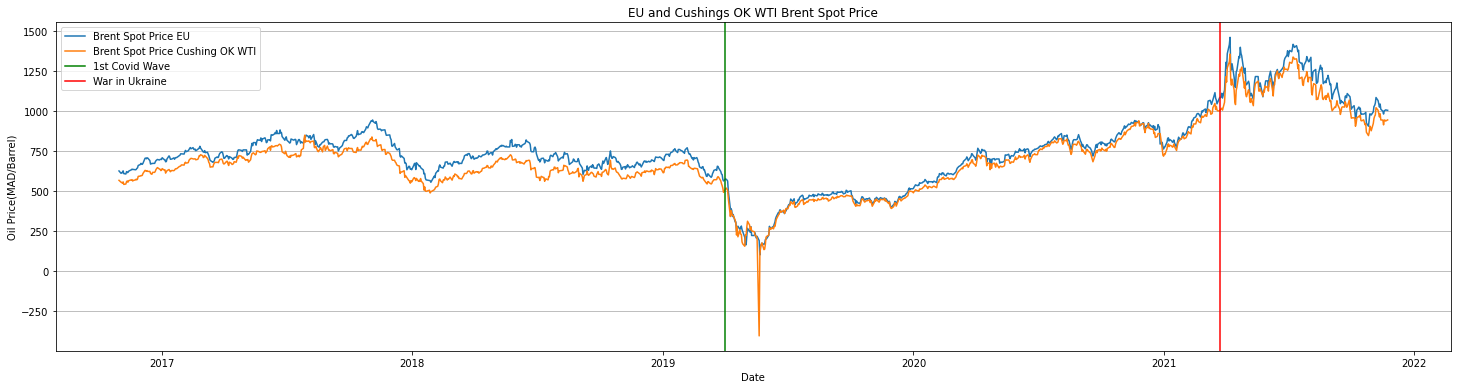

In [ ]:
formatter = mdates.DateFormatter("%Y")
fig = plt.figure(figsize=(20, 5))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
plt.plot(df_BrentSpotPriceEU['date'], df_BrentSpotPriceEU['value'], label ='Brent Spot Price EU')
plt.plot(df_BrentSpotPriceCushingOKWTI['date'], df_BrentSpotPriceCushingOKWTI['value'], label ='Brent Spot Price Cushing OK WTI')
plt.axvline(dt.datetime(2020,3,1), color='green', label="1st Covid Wave")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.xlabel('Date')
plt.ylabel('Oil Price(MAD/Barrel)')
plt.title("EU and Cushings OK WTI Brent Spot Price")
plt.grid(axis="y")
plt.legend()
plt.show()
# add trend plot dashed

In [ ]:
df_BrentSpotPriceEU_moving_average_50 = df_BrentSpotPriceEU.copy()
df_BrentSpotPriceEU_moving_average_50['value'] = df_BrentSpotPriceEU_moving_average_50['value'].rolling(50).mean()
df_BrentSpotPriceEU_moving_average_50 = pd.DataFrame(df_BrentSpotPriceEU_moving_average_50)

df_BrentSpotPriceEU_moving_average_200 = df_BrentSpotPriceEU.copy()
df_BrentSpotPriceEU_moving_average_200['value'] = df_BrentSpotPriceEU_moving_average_200['value'].rolling(200).mean()
df_BrentSpotPriceEU_moving_average_200 = pd.DataFrame(df_BrentSpotPriceEU_moving_average_200)

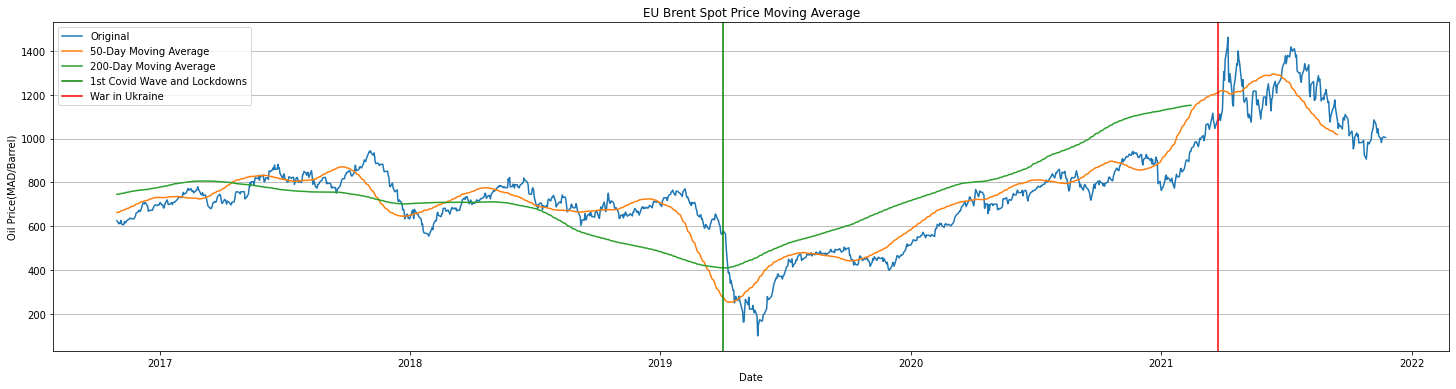

In [ ]:
formatter = mdates.DateFormatter("%Y")
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.xticks(rotation=90, fontweight='light',  fontsize='x-small')
plt.tight_layout()
plt.plot(df_BrentSpotPriceEU['date'], df_BrentSpotPriceEU['value'], label="Original")
plt.plot(df_BrentSpotPriceEU_moving_average_50['date'], df_BrentSpotPriceEU_moving_average_50['value'], label="50-Day Moving Average")
plt.plot(df_BrentSpotPriceEU_moving_average_200['date'], df_BrentSpotPriceEU_moving_average_200['value'],  label="200-Day Moving Average")
plt.axvline(dt.datetime(2020,3,1), color='green', label="1st Covid Wave and Lockdowns")
plt.axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price(MAD/Barrel)")
plt.title("EU Brent Spot Price Moving Average")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#compare between before UKR and after

In [ ]:
df_BrentSpotPriceEU_diff = df_BrentSpotPriceEU.set_index('date').diff()
df_BrentSpotPriceEU_diff_monthly = df_BrentSpotPriceEU.set_index('date').diff(30)
df_BrentSpotPriceEU_diff.tail()

,value
date,
2017-10-05,17.4582
2017-10-04,-11.9682
2017-10-03,1.3176
2017-10-02,-4.9410
2017-09-29,14.8230


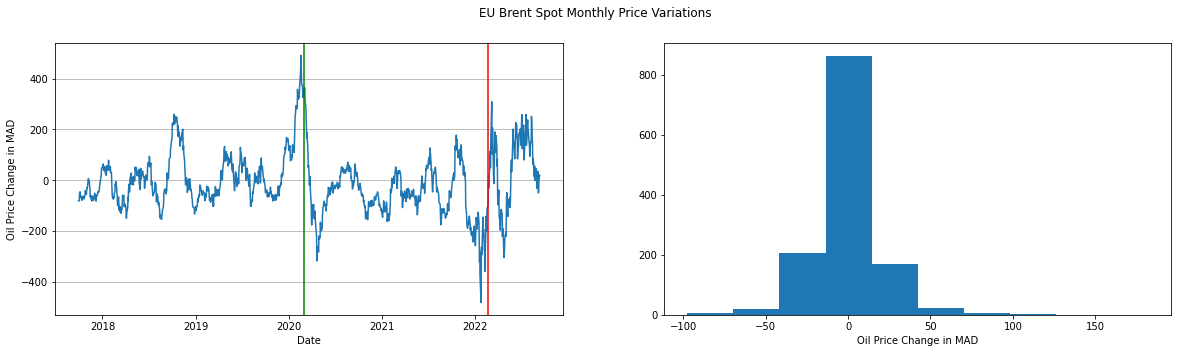

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,5))
axes[0].plot(df_BrentSpotPriceEU_diff_monthly)
axes[0].axvline(dt.datetime(2020,3,1), color='green', label="1st Covid Wave")
axes[0].axvline(dt.datetime(2022,2,21), color='red', label="War in Ukraine")
axes[0].grid(axis="y")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Oil Price Change in MAD")
axes[1].hist(df_BrentSpotPriceEU_diff["value"])
axes[1].set_xlabel("Oil Price Change in MAD")
fig.suptitle("EU Brent Spot Monthly Price Variations")
plt.show()

The main price variations seem to have occured with the first Covid Wave and the start of the War in Ukraine.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


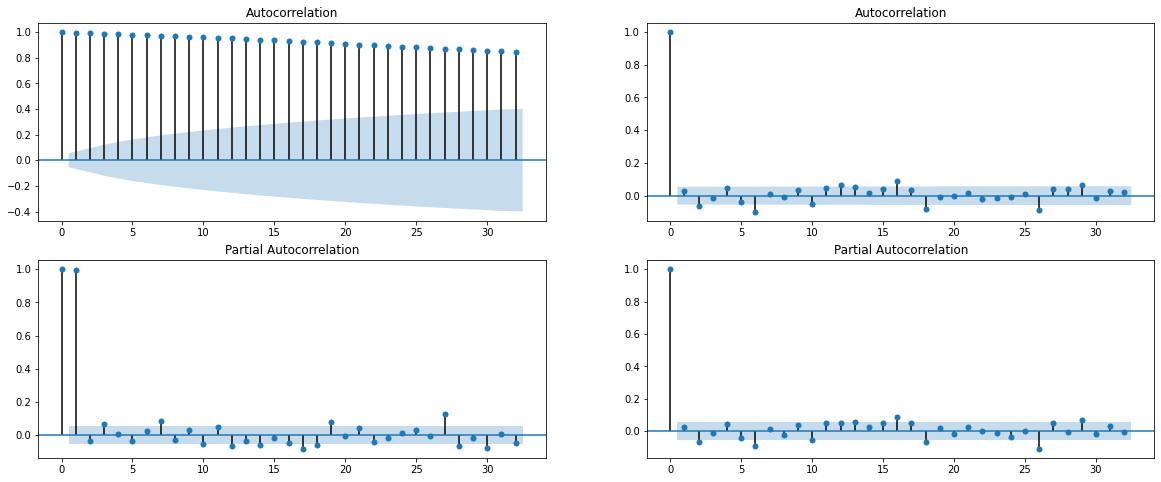

In [ ]:
acf = sm.tsa.stattools.acf(df_BrentSpotPriceEU["value"].dropna())
pacf = sm.tsa.stattools.pacf(df_BrentSpotPriceEU["value"].dropna(), method='ols')

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(df_BrentSpotPriceEU["value"].dropna(), ax=ax1)
ax2 = fig.add_subplot(223)
axes = sm.graphics.tsa.plot_pacf(df_BrentSpotPriceEU["value"].dropna(), ax=ax2)
ax3 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_acf(df_BrentSpotPriceEU_diff.dropna(), ax=ax3)
ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(df_BrentSpotPriceEU_diff.dropna(), ax=ax4)

In the first plot of the daily values, autocorrelation seems to be extremely strong, whereas partial correlation seem to indicate that correlation with the price of one or two days is large, while there is almost no correlation with the other values.

In the second plot of the daily performance values, the autocorrelations are much smaller, with only first-order autocorrelations.

We will test to see if the crude oil price data can be called a unit root process. We will use the augmented Dickey-Fullar test, which is the most commonly used unit root test. A unit root (also called a unit root process or a difference stationary process) is a stochastic trend in a time series, sometimes called a “random walk with drift”. If a time series has a unit root, it shows a systematic pattern that is unpredictable.

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the p-value is above a critical value, then we cannot reject that there is a unit root.

In [ ]:
adf_result = sm.tsa.stattools.adfuller(df_BrentSpotPriceEU["value"])
print("Augmented Dickey-Fullartest test on EU Crude Oil Prices : \ntest statistic : " + str(adf_result[0]) + " | p-value : " + str(adf_result[1]) + "\n" + str(adf_result[4]))

Augmented Dickey-Fullartest test on EU Crude Oil Prices : 
test statistic : -1.9946030649287272 | p-value : 0.2889444693585579
{'1%': -3.435469111362934, '5%': -2.8638006501960755, '10%': -2.567973589477539}


0.2889444693585579 is greater than 0.05, the null hypothesis can be rejected.

In [ ]:
adf_result = sm.tsa.stattools.adfuller(df_BrentSpotPriceEU["value"].diff().dropna())
print("\nAugmented Dickey-Fullartest test on the monthly difference series of the EU Crude Oil Prices: \ntest statistic : " + str(adf_result[0]) + " | p-value : " + str(adf_result[1]) + "\n" + str(adf_result[4]))


Augmented Dickey-Fullartest test on the monthly difference series of the EU Crude Oil Prices: 
test statistic : -7.003900835316961 | p-value : 7.204161631846273e-10
{'1%': -3.435469111362934, '5%': -2.8638006501960755, '10%': -2.567973589477539}


The p-value is smaller than 0.01 and the null hypothesis is rejected. This means that the difference series is not a unit root process.

## Additionnal Indicators

We plot the market intraday evolution

In [ ]:
df_marketIntraday = pd.DataFrame.from_dict(getData("https://medias24.com/content/api?method=getMarketIntraday&format=json")["result"][0])
df_marketIntraday["variations"] = df_marketIntraday["prices"].astype(float).diff()
df_marketIntraday.tail()

,labels,prices,variations
113,15:14,10869.03,-0.30
114,15:16,10868.33,-0.70
115,15:18,10868.30,-0.03
116,15:19,10868.30,0.00
117,15:30,10850.63,-17.67


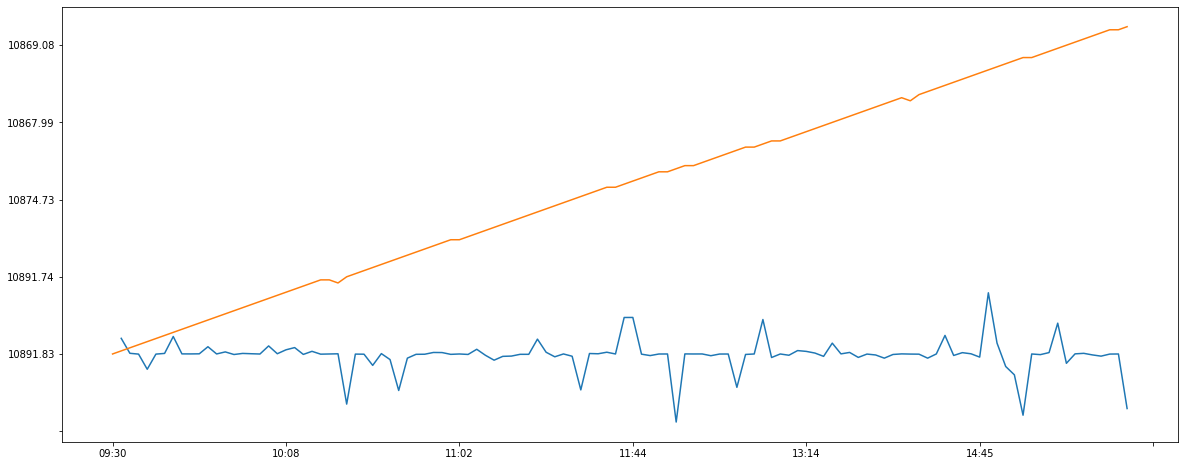

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df_marketIntraday["labels"], df_marketIntraday["variations"])
plt.plot(df_marketIntraday["labels"], df_marketIntraday["prices"])
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

In [ ]:
df_indexMASI = pd.DataFrame.from_dict(getData("https://medias24.com/content/api?method=getMasiInfo&format=json"))
df_indexMASI = pd.DataFrame(df_indexMASI["result"])
df_indexMASI = df_indexMASI.rename(columns={'result' : 'MASI'})
df_indexMASI = df_indexMASI.drop(['ISIN','nbTitre', 'volume', 'volumeTitre', 'name_2'])

df_indexMSI20 = pd.DataFrame.from_dict(getData("https://medias24.com/content/api?method=getIndexInfo&ISIN=msi20&format=json"))
df_indexMSI20 = pd.DataFrame(df_indexMSI20["result"])
df_indexMSI20 = df_indexMSI20.rename(columns={'result' : 'MSI20'})
df_indexMSI20 = df_indexMSI20.drop(['ISIN','nbTitre', 'volume', 'volumeTitre', 'name_2'])

df_indexIndexes = pd.concat([df_indexMSI20, df_indexMASI], axis=1, join='inner')
df_indexIndexes

,MSI20,MASI
capitalisation,0.00,0.00
cloture,868.90,10844.40
cotation,28/10/2022 à 16:00,28/10/2022 à 16:00
cours,866.868,10850.633
max,875.692,10909.751
min,866.608,10824.324
name,MSI20 Idx,INDICE MASI
ouverture,868.896,10844.402
variation,-0.23,0.06
volume_variation,-2.00,6.51


NB : the MSI20 index or Morocco Stock Index 20 is the new label of what was previously labeled as the MADEX index